In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5359.5/8062.4 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="peAtdpeJN9JbTS3jM8EV")
project = rf.workspace("pidray-8gl3p").project("pidray-bbmo7")
dataset = project.version(3).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.1, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PIDRAY-3 in yolov8:: 100%|██████████| 19974/19974 [00:02<00:00, 7906.24it/s] 


In [3]:
yolo8_model_detection =YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 209MB/s]


In [7]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/PIDRAY-3 datasets/sixray100-1

In [8]:
yolo8_model_detection.train(data='/kaggle/working/datasets/sixray100-1/data.yaml', epochs=120, imgsz=640, batch=32,project='YOLO_weights',name='SIXray_Output',exist_ok=True)

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/datasets/sixray100-1/data.yaml, epochs=120, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|██████████| 755k/755k [00:00<00:00, 12.8MB/s]
2024-01-15 12:21:28,374	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-15 12:21:28,944	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 70.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/train/labels... 7741 images, 1258 backgrounds, 0 corrupt: 100%|██████████| 7741/7741 [00:06<00:00, 1184.40it/s]


train: New cache created: /kaggle/working/datasets/sixray100-1/PIDRAY-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:01<00:00, 1366.11it/s]


val: New cache created: /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels.cache
Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120        14G      1.303      3.061      1.492         54        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:19<00:00,  1.31it/s]

                   all       1537       1627      0.631      0.329      0.384      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      14.1G      1.097      1.492      1.294         55        640: 100%|██████████| 242/242 [03:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.718      0.385      0.393      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      13.8G      1.193      1.507      1.351         40        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.678      0.279      0.279      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      13.8G      1.359      1.727      1.467         64        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.545      0.314      0.331      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      13.8G      1.339      1.604      1.458         59        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627       0.47      0.361      0.349      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      13.8G      1.264      1.455      1.409         65        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]

                   all       1537       1627      0.548      0.438      0.412      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      13.8G      1.213      1.372      1.375         65        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]

                   all       1537       1627       0.58      0.433      0.433        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      13.8G      1.173      1.282      1.349         55        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.592      0.378      0.436      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      13.8G      1.145      1.228      1.322         51        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.503      0.481      0.434      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      13.8G      1.098      1.155      1.295         74        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]

                   all       1537       1627      0.642      0.448      0.508      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      13.8G      1.083      1.134      1.282         64        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.766      0.431      0.507      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      13.8G      1.053      1.076      1.266         54        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.794       0.53      0.576      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      13.8G      1.018      1.032      1.236         52        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.757      0.552      0.551       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      13.8G      1.008      1.004      1.232         61        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.787      0.582      0.602      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      13.8G      1.002     0.9858      1.233         45        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627       0.58      0.549      0.532       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      13.8G     0.9783     0.9609      1.213         48        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.779      0.545      0.586      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      13.8G     0.9623     0.9414      1.206         71        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.649      0.517      0.541      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      13.8G     0.9544     0.9199      1.204         60        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627       0.79      0.559      0.569      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      13.8G      0.945     0.9084      1.196         61        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.853      0.582      0.628        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      13.8G     0.9316     0.8767      1.179         48        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.839       0.56      0.607      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      13.8G     0.9236     0.8725       1.18         58        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.846       0.61      0.667      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      13.8G     0.9084     0.8467      1.166         53        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.845      0.578      0.653      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      13.8G     0.9013     0.8412      1.159         70        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627       0.82      0.597      0.624       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      13.8G      0.896     0.8358      1.161         57        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.806      0.571      0.618      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      13.8G     0.8751     0.8142      1.142         65        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627      0.737      0.576      0.654      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      13.8G     0.8725      0.783      1.141         53        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627      0.804      0.601      0.649      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      13.8G     0.8552     0.7724       1.13         51        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.772       0.58      0.626      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      13.8G     0.8593     0.7663      1.141         67        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.888      0.568      0.667      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      13.8G     0.8491     0.7605      1.125         56        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.834       0.59      0.623      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      13.8G     0.8379      0.744      1.118         56        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.868      0.639      0.682      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      13.8G     0.8294     0.7376      1.118         66        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.869      0.592      0.637      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      13.8G     0.8152     0.7235      1.105         64        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.839      0.635      0.692      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      13.8G      0.822      0.717       1.11         57        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.865      0.601       0.67      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      13.8G      0.816     0.7061      1.104         55        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.837      0.636      0.698      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      13.8G     0.7966     0.6862      1.094         56        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.891      0.598      0.662      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      13.8G     0.8033     0.6938      1.095         57        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.644      0.656      0.663      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      13.8G     0.8014     0.6884      1.097         59        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627        0.7      0.693      0.699      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      13.8G     0.7972     0.6857      1.092         48        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627       0.92      0.631      0.716      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      13.8G     0.7837     0.6733      1.087         51        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.906       0.61      0.692      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      13.8G     0.7767     0.6606      1.078         75        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.921      0.607      0.678      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      13.8G     0.7796     0.6622      1.087         57        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.871        0.6      0.691       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      13.8G     0.7711     0.6451      1.076         57        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.798      0.634      0.684      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      13.8G      0.761     0.6376      1.071         59        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.789      0.685      0.719      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      13.8G     0.7624     0.6448      1.075         55        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.804      0.612      0.689      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      13.8G     0.7584     0.6348      1.067         72        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627       0.79      0.694      0.732      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      13.8G     0.7493     0.6237      1.064         67        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.855      0.664      0.735      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      13.8G     0.7459     0.6195      1.057         50        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627      0.711      0.715      0.723      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      13.8G     0.7369     0.6097      1.053         59        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627      0.682      0.693      0.726      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      13.8G     0.7274     0.5987      1.048         62        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.806      0.689      0.738       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      13.8G     0.7287     0.6021      1.049         72        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.847      0.653      0.725      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      13.8G      0.726     0.5935      1.048         67        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627      0.831       0.65      0.711      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      13.8G     0.7187     0.5915      1.044         49        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.686      0.713      0.749      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      13.8G     0.7228     0.5843      1.043         68        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627      0.869      0.641      0.707      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      13.8G     0.7177      0.579      1.045         72        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.763      0.717      0.738      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      13.8G     0.7078     0.5789      1.039         47        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.885      0.653      0.726      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      13.8G     0.7048     0.5729      1.037         49        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627      0.883      0.624      0.723      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      13.8G     0.7022      0.561      1.034         70        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.826      0.684      0.747      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      13.8G     0.6957     0.5594      1.033         50        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.689      0.695      0.725      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      13.8G     0.6948     0.5582      1.034         75        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.784      0.705      0.737      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      13.8G     0.6834     0.5421      1.021         72        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627      0.831      0.641      0.724      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      13.8G     0.6874     0.5532      1.026         49        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627        0.9      0.643      0.738      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      13.8G     0.6746     0.5445      1.017         64        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627       0.85      0.695      0.767      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      13.8G     0.6723     0.5313      1.018         50        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627      0.762      0.696      0.729      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      13.8G     0.6735     0.5355      1.019         48        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627      0.911      0.635      0.751      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      13.8G     0.6686     0.5263      1.016         77        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627      0.827      0.705      0.762      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      13.8G       0.67     0.5325      1.012         70        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627      0.754      0.724       0.75      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      13.8G     0.6558     0.5132      1.009         63        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.919      0.656      0.751      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      13.8G      0.652     0.5064      1.002         82        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]

                   all       1537       1627      0.871      0.707       0.77      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      13.8G     0.6553      0.508      1.005         58        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627       0.83       0.72      0.786      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      13.8G     0.6509     0.5108      1.006         71        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.864      0.675      0.761      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      13.8G     0.6418     0.4968     0.9996         59        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.883      0.689      0.761      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      13.8G     0.6322     0.4922     0.9939         44        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.732       0.74      0.757       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      13.8G     0.6382     0.4966      1.001         82        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.932      0.651      0.759      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      13.5G     0.6354     0.4869     0.9993         53        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.40it/s]

                   all       1537       1627      0.839      0.704      0.742       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      13.8G     0.6409     0.4955      1.001         45        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.851      0.716      0.756      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      13.8G     0.6189     0.4735     0.9905         64        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.871      0.697      0.746      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      13.8G     0.6219     0.4771     0.9937         58        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627       0.93       0.69      0.754      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      13.8G     0.6176     0.4757       0.99         63        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627       0.92      0.675      0.758      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      13.8G     0.6104     0.4675     0.9845         56        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.932      0.661      0.743      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      13.8G     0.6046     0.4586     0.9818         53        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.938      0.675      0.739      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      13.8G     0.6051     0.4527     0.9826         69        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.904      0.689      0.745      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      13.8G      0.595     0.4489     0.9725         50        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]

                   all       1537       1627      0.919      0.664       0.77      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      13.4G     0.6034      0.456     0.9784         58        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.823      0.732       0.79      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      13.8G     0.6012     0.4515     0.9821         61        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.793      0.738      0.788      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      13.8G     0.5865     0.4391     0.9732         65        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.898      0.709      0.784      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      13.5G     0.5842     0.4367     0.9736         65        640: 100%|██████████| 242/242 [03:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.839      0.734      0.784      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      13.8G     0.5838     0.4342     0.9688         68        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.879      0.724      0.781       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      13.8G     0.5858     0.4334     0.9723         63        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.887      0.722      0.773       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      13.8G     0.5707     0.4255     0.9645         61        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.777      0.725      0.771      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      13.8G     0.5679     0.4258     0.9649         57        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.734      0.743      0.753      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      13.8G     0.5702     0.4181     0.9603         54        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.918       0.66      0.748      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      13.8G     0.5653      0.419     0.9615         43        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.941      0.653      0.735      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      13.5G     0.5606     0.4107     0.9611         54        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.938       0.65      0.735       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      13.5G      0.562     0.4215     0.9642         53        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.933      0.654      0.738      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      13.5G     0.5555     0.4122     0.9609         92        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.923      0.655      0.733       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      13.5G     0.5428     0.3992     0.9517         57        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]

                   all       1537       1627       0.93      0.657      0.739      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      13.5G     0.5505     0.4056     0.9586         54        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]

                   all       1537       1627      0.793      0.672      0.736      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      13.8G     0.5503     0.3997     0.9553         39        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.792      0.681      0.733      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      13.5G     0.5342     0.3915     0.9493         62        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.804      0.676      0.739      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      13.3G     0.5386     0.3942     0.9538         93        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.809      0.675      0.738      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      13.5G     0.5321     0.3871     0.9483         56        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.801      0.681      0.737      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      13.8G     0.5263     0.3821     0.9445         78        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.803       0.68      0.739      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      13.8G     0.5312     0.3862     0.9489         51        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.791      0.681      0.742      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      13.8G     0.5239     0.3773     0.9472         53        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.779      0.686      0.754      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      13.8G     0.5192     0.3763     0.9409         57        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]

                   all       1537       1627      0.762      0.735      0.763      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      13.5G     0.5162     0.3719     0.9407         62        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.779       0.74      0.765      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      13.8G     0.5026     0.3649     0.9359         55        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]

                   all       1537       1627      0.784      0.729      0.762      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120        14G     0.5035     0.3656     0.9348         61        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]

                   all       1537       1627      0.778      0.741      0.763      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      13.8G     0.5024     0.3612     0.9347         68        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.777      0.753      0.767      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      13.8G     0.4975      0.358     0.9322         64        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]

                   all       1537       1627      0.754      0.748      0.769      0.673


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      13.8G      0.391     0.2379     0.8498         29        640: 100%|██████████| 242/242 [03:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]

                   all       1537       1627      0.896      0.717      0.771      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      13.8G     0.3788     0.2312     0.8449         27        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.887      0.721      0.773      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      13.8G      0.372     0.2308     0.8434         32        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.891      0.726      0.769      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      13.5G     0.3712     0.2233     0.8404         25        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627       0.89      0.724      0.769      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      13.8G     0.3638     0.2202     0.8375         34        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.42it/s]

                   all       1537       1627      0.893      0.724      0.769      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      13.8G     0.3619     0.2198     0.8374         33        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]

                   all       1537       1627      0.892      0.724       0.77      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      13.8G     0.3588     0.2155     0.8339         27        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.892      0.724      0.777      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      13.8G     0.3549     0.2134     0.8334         30        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.887      0.726      0.778      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      13.8G     0.3471      0.207     0.8318         31        640: 100%|██████████| 242/242 [03:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.883      0.725      0.778      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      13.8G     0.3468     0.2066     0.8295         28        640: 100%|██████████| 242/242 [03:39<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]

                   all       1537       1627      0.883      0.724      0.792      0.668



120 epochs completed in 7.983 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 52.0MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 52.0MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:20<00:00,  1.22it/s]


                   all       1537       1627      0.824      0.732      0.791      0.677
                 Baton       1537          4      0.585       0.25      0.382      0.237
                Bullet       1537          9      0.748      0.222      0.386      0.229
                   Gun       1537         17      0.623      0.706      0.726      0.655
                Hammer       1537        960      0.999       0.98      0.995      0.974
             HandCuffs       1537         13      0.907      0.923      0.899      0.758
                 Knife       1537         13      0.896      0.667      0.872      0.769
               Lighter       1537         16      0.671      0.688      0.695      0.585
                Pliers       1537        375      0.976      0.959       0.99      0.897
             Powerbank       1537         49      0.907      0.993      0.988      0.834
              Scissors       1537        171      0.927       0.93      0.977      0.836
Speed: 0.4ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c22a31944f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [11]:
# Load a model
#model = YOLO('path/to/best.pt')  # load a custom model
# Validate the model
metrics = yolo8_model_detection.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels.cache... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]


                   all       1537       1627      0.798      0.735      0.794       0.68
                 Baton       1537          4      0.441       0.25       0.41      0.247
                Bullet       1537          9      0.726      0.222      0.381      0.224
                   Gun       1537         17      0.548      0.706      0.734      0.655
                Hammer       1537        960      0.998      0.984      0.995      0.975
             HandCuffs       1537         13      0.923       0.92      0.904      0.769
                 Knife       1537         13      0.896      0.663      0.863      0.777
               Lighter       1537         16      0.656      0.688      0.698      0.581
                Pliers       1537        375      0.973       0.96      0.989        0.9
             Powerbank       1537         49      0.899          1      0.988      0.833
              Scissors       1537        171      0.919      0.953      0.975      0.836
Speed: 0.3ms preproce

array([    0.24672,     0.22364,     0.65529,     0.97465,     0.76889,     0.77723,     0.58126,     0.89966,     0.83316,     0.83584])

# **MODEL PREDICTION**


image 1/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23727_png.rf.60d1c5be783f92da65107fcee8eef836.jpg: 608x640 1 Hammer, 38.1ms
image 2/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23887_png.rf.c6d13016a52a1944cd78d76612e8ce1d.jpg: 640x640 1 Hammer, 37.7ms
image 3/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23888_png.rf.e418610f9ea47c4fae3a5e5fae317f7b.jpg: 480x640 1 Hammer, 28.8ms
image 4/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23890_png.rf.b74b1ca97d05cdd365953dd881cc440e.jpg: 480x640 1 Hammer, 1 HandCuffs, 28.1ms
image 5/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23891_png.rf.6e420733a31c0db4c601f246f52d1b19.jpg: 416x640 1 Hammer, 21.6ms
image 6/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23892_png.rf.0b07c8f337874b55451f39d618f2d2c8.jpg: 512x640 (no detections), 19.4ms
image 7/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23893_png.rf.cf68d8f69d036634178b9e2f3afd64c0.jpg: 480x640 1 

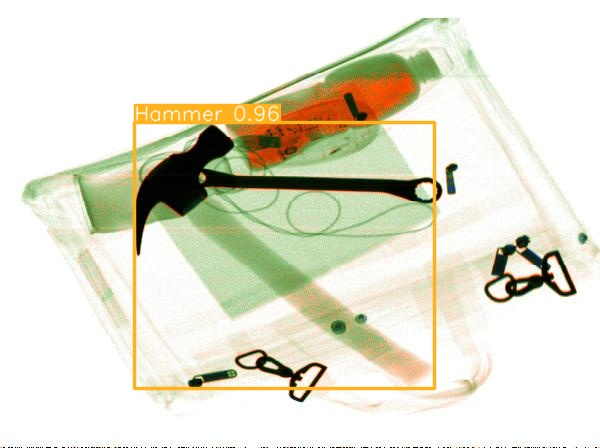

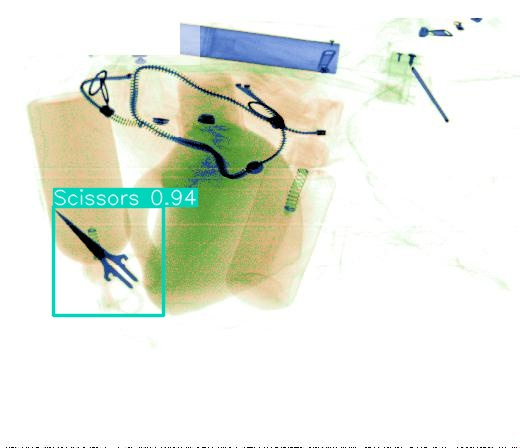

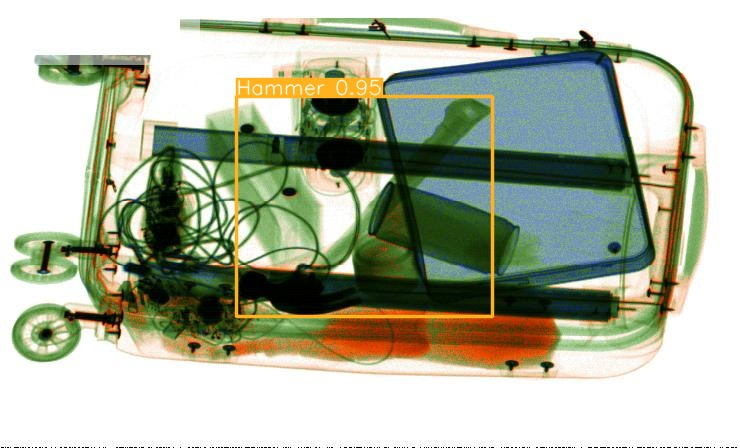

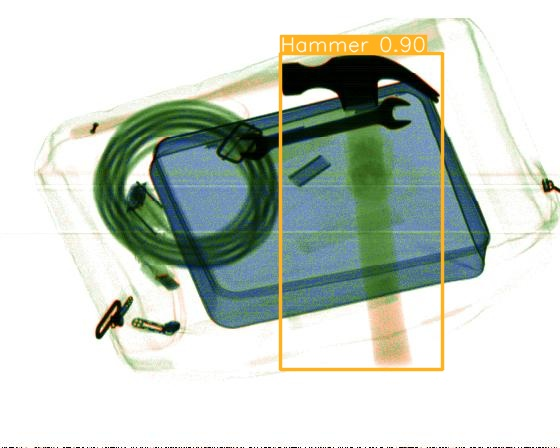

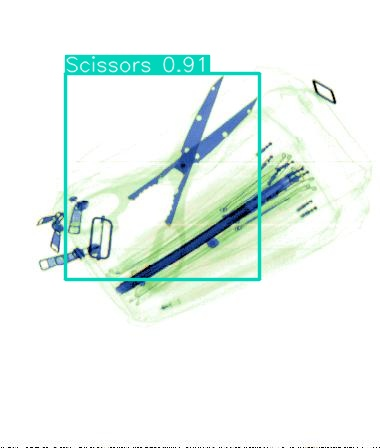

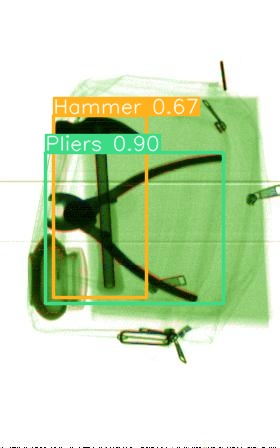

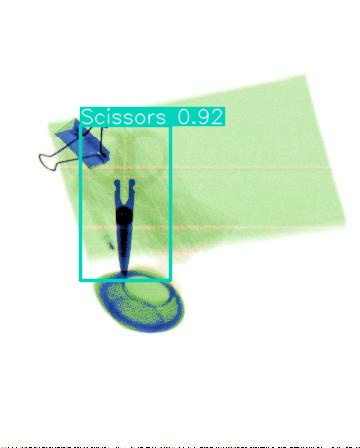

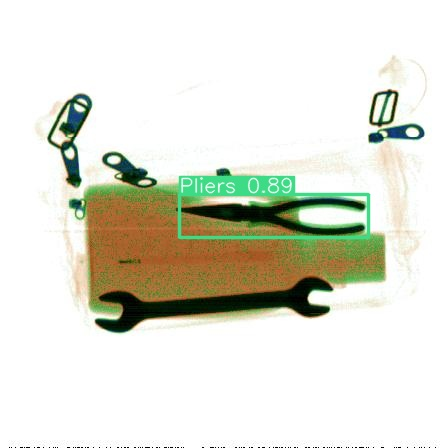

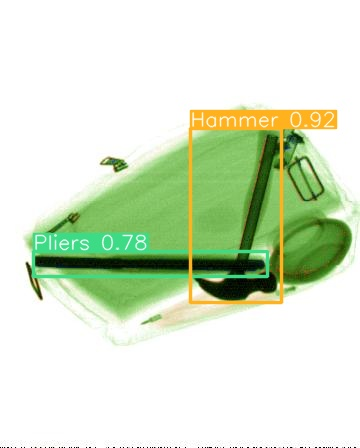

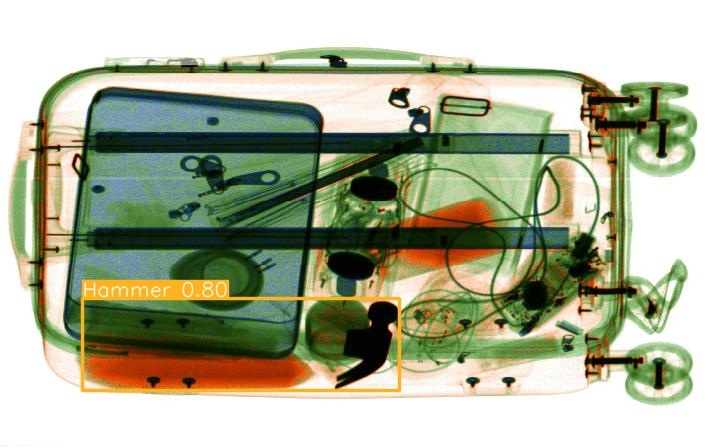

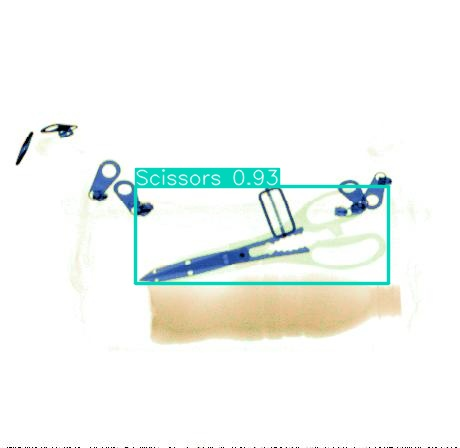

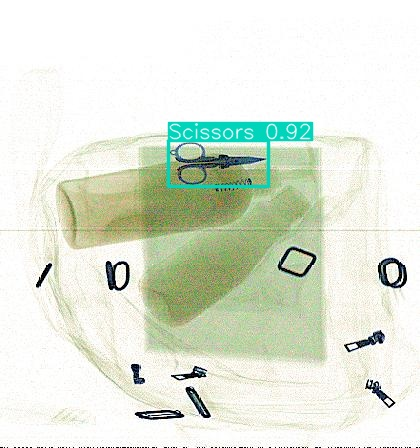

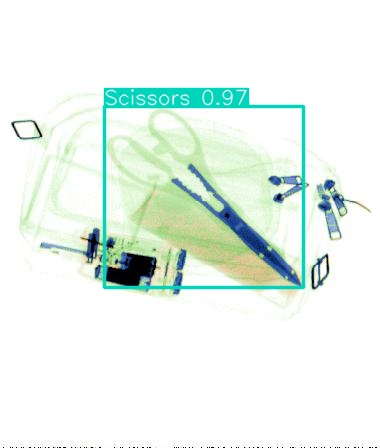

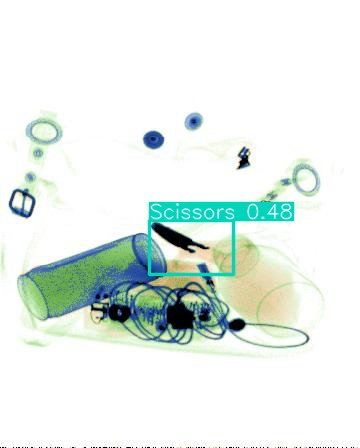

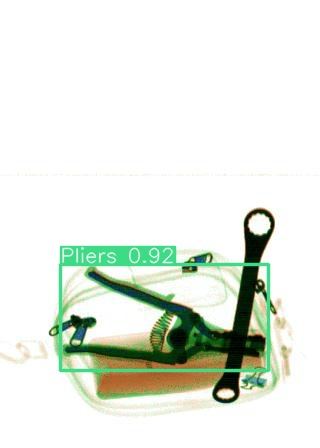

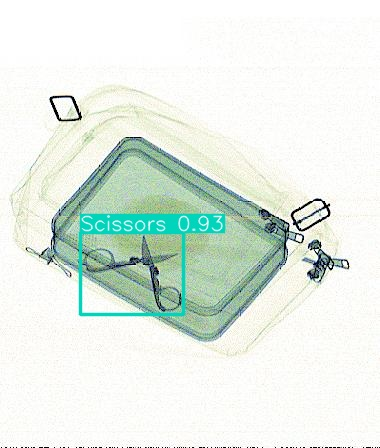

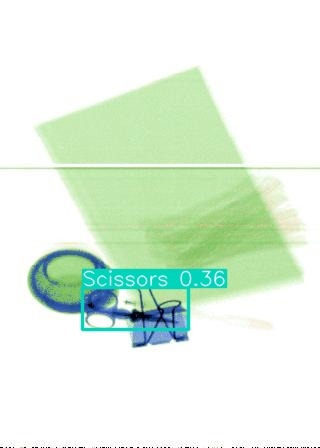

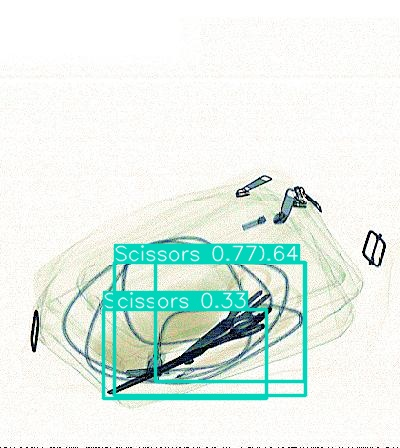

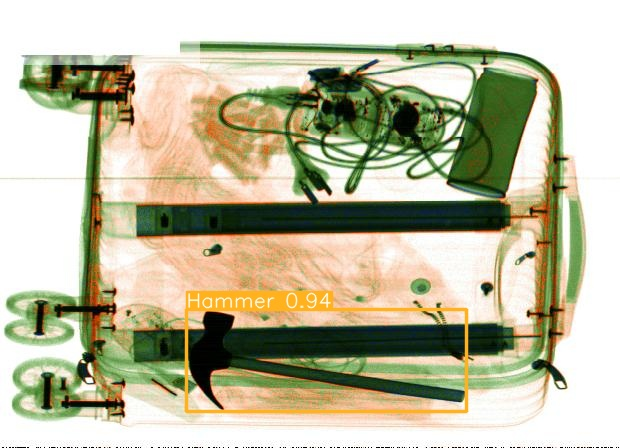

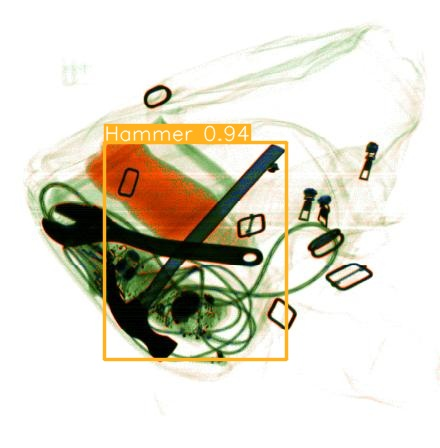

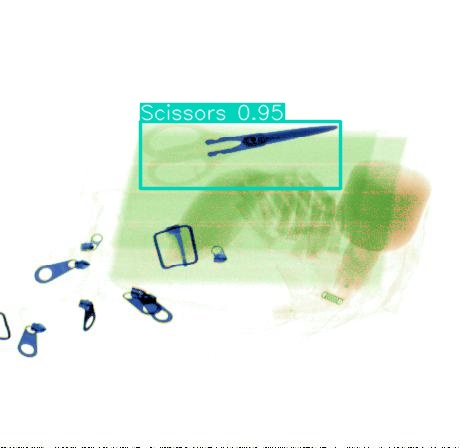

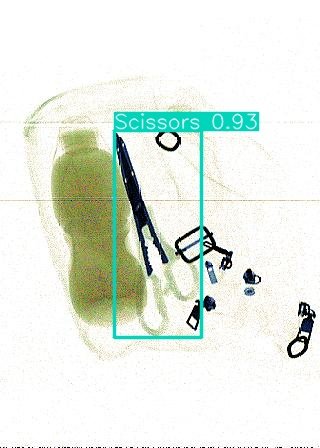

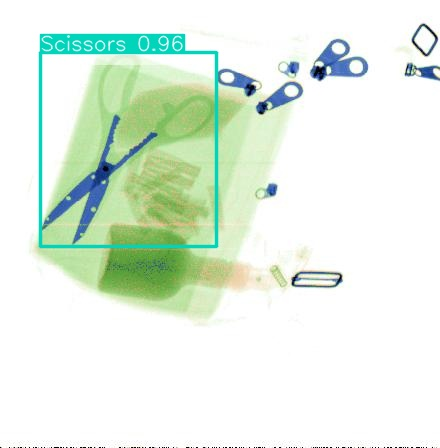

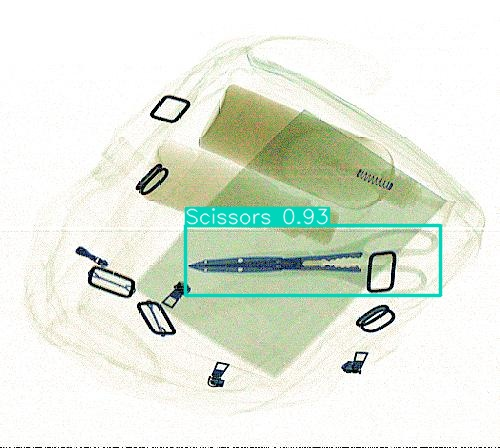

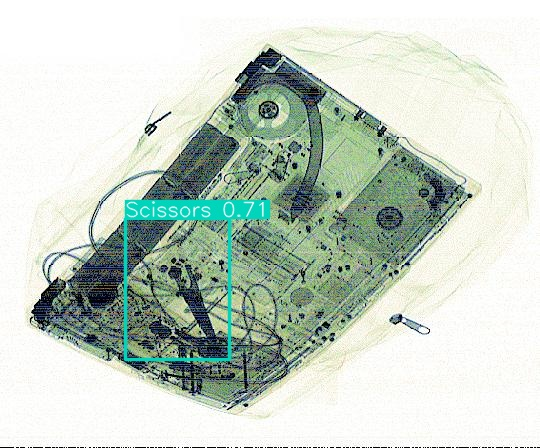

In [12]:
yolo8_model_detection=YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/datasets/sixray100-1/test/images', save=True)
from IPython.display import Image, display
import os

res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [13]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)

Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5362.9/8062.4 GB disk)

Benchmarks complete for best.pt on /kaggle/working/datasets/sixray100-1/data.yaml at imgsz=640 (1807.63s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅       49.6               0.6817                   21.38
1             TorchScript       ✅       99.1               0.6718                   20.67
2                    ONNX       ❎       98.8                  NaN                     NaN
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❎      126.6                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ✅      247.1               0.6718                   34.46
7     TensorFlow GraphDef       ✅       98.9               0.6718                   33.54
8         TensorFlow 

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im)
0,PyTorch,✅,49.6,0.6817,21.38
1,TorchScript,✅,99.1,0.6718,20.67
2,ONNX,❎,98.8,NaN,NaN
3,OpenVINO,❌,0.0,NaN,NaN
4,TensorRT,❎,126.6,NaN,NaN
5,CoreML,❌,0.0,NaN,NaN
6,TensorFlow SavedModel,✅,247.1,0.6718,34.46
7,TensorFlow GraphDef,✅,98.9,0.6718,33.54
8,TensorFlow Lite,❌,0.0,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN
